In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [2]:
# load dataset and show the first five sample
data = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
data.sample(n=5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
93,94,Female,40,60,40
102,103,Male,67,62,59
177,178,Male,27,88,69
7,8,Female,23,18,94
137,138,Male,32,73,73


In [3]:
# rename the Annual Income (k$)	Spending Score (1-100) column
data = data.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'})

In [4]:
# describe data
data.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for null values in the dataset
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual_Income,0
Spending_Score,0


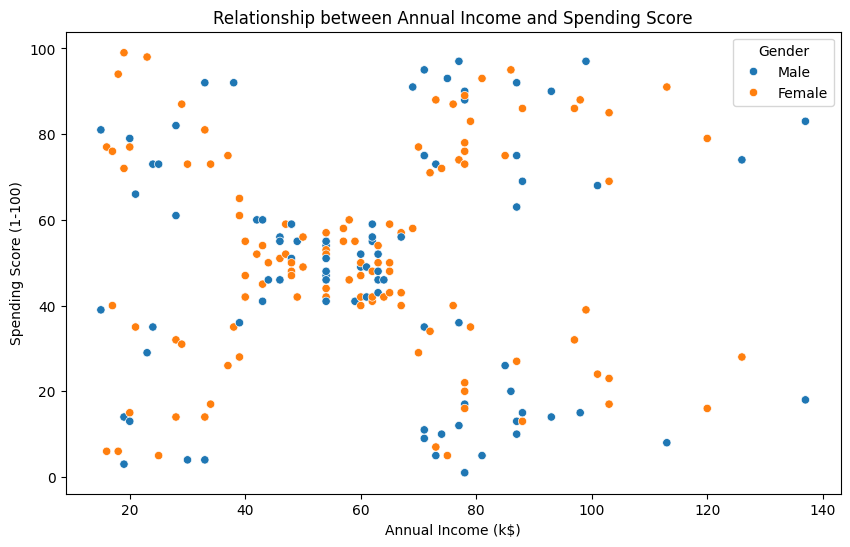

In [6]:
# make an insightful visualization and explain
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=data, hue='Gender')
plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Data Preprocessing

For this case study, we only use income and spending score

In [7]:
# create new dataframe that consist only annual income and spending score
income_spending = data[['Annual_Income', 'Spending_Score']]

Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(income_spending)
scaled_data = pd.DataFrame(scaled_data, columns=['Annual_Income', 'Spending_Score']) # convert back to pandas DataFrame

In [10]:
# get stastical information on the new dataset
scaled_data.describe()

,Annual_Income,Spending_Score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

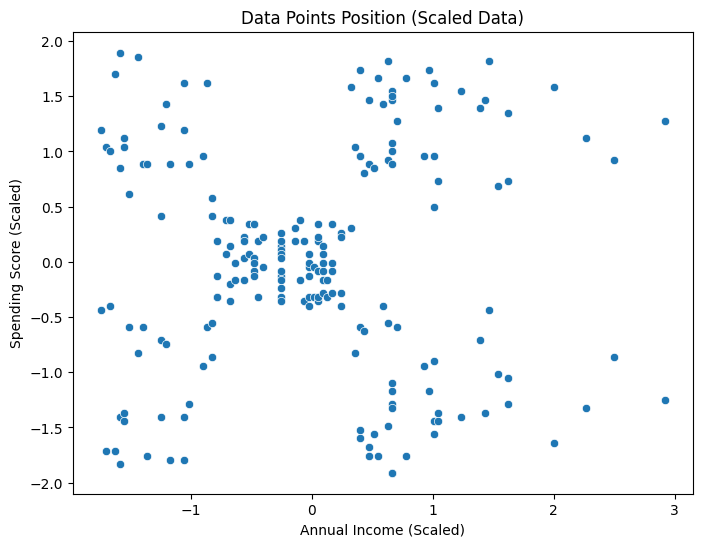

In [13]:
# Visualize the position
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=scaled_data)
plt.title('Data Points Position (Scaled Data)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [14]:
# set the parameter for evaluating K
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

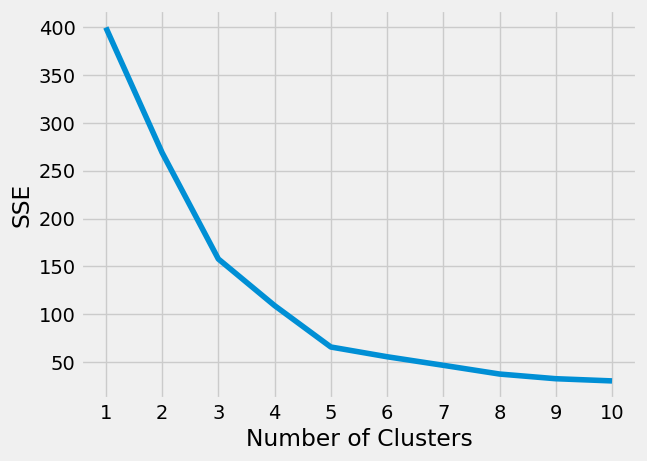

In [15]:
# manually visualize the elbow method using plotlib
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show

In [16]:
# using kneelocator to find the elbow/knee
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

print(f"The optimal number of clusters (K) is: {kl.elbow}")

The optimal number of clusters (K) is: 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [23]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_data)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

Visualize your result based on income and spending. You also can show the final position of the centroid.

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

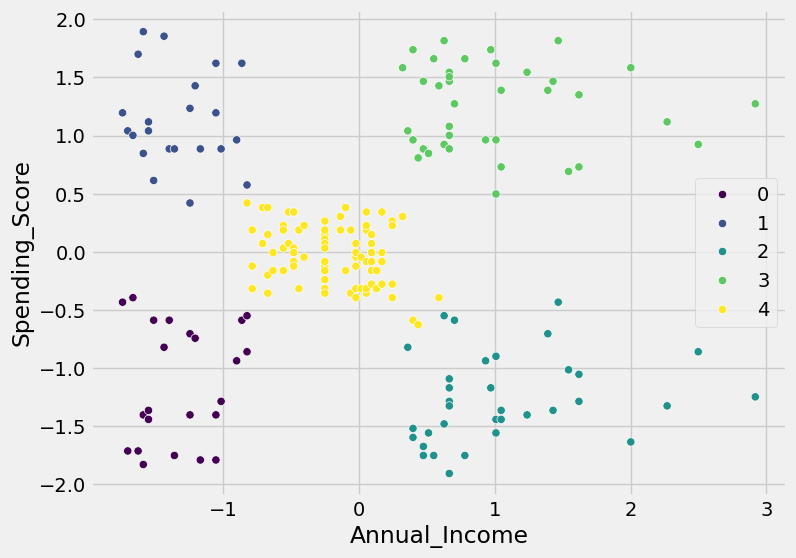

In [24]:
# visualize the result using scater chart
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=scaled_data, hue=kmeans.labels_, palette='viridis')

In [25]:
# Inverse transform the scaled data to get the original values
# Inverse transform the scaled data
original_data = scaler.inverse_transform(scaled_data)
original_data = pd.DataFrame(original_data, columns=['Annual_Income', 'Spending_Score'])#convert back to pandas DataFrame

# Update the 'Annual_Income' and 'Spending_Score' columns in the original DataFrame
data['Annual_Income'] = original_data['Annual_Income']
data['Spending_Score'] = original_data['Spending_Score']

In [27]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_means = data.groupby('Cluster')[['Spending_Score', 'Annual_Income']].mean()
cluster_means

,Spending_Score,Annual_Income
Cluster,,
0,20.913043,26.304348
1,79.363636,25.727273
2,17.114286,88.200000
3,82.128205,86.538462
4,49.518519,55.296296


By leveraging these clustering insights, the company can gain a deeper understanding of its customers and develop more effective strategies to increase sales, improve customer satisfaction, and drive business growth.

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>